# Literature Survey

## 1. Introduction
**Reduced to the CAPTCHA acronym**, the term, "completely automated public Turing test to tell computers and humans apart," was proposed by Louis von Ahn et al. in 2003. CAPTCHAs are commonly used to authenticate website users and distinguish them from computer bots, hence, maximizing the security of the web.

## 2. Types of CAPTCHAs
**2.1. Text-based CAPTCHAs**: To be acquired by a user, usually it is a piece of text that the user simply needs to type in the correct characters into the box, which are read without user interaction, is the common form of this type.

**2.2. Image-based CAPTCHAs**: These are designed so that a person can only solve them by recognizing items through their vision.

**2.3. Audio CAPTCHAs**: The numbers and words in audio CAPTCHA are spoken by the voice. Users have to write the correct numbers or words into a text box.

## 3. Obstacles and Their Resolutions
**3.1. Background Noise and Text Manipulation**: Techniques such as adding background noise, warping, rotating, changing the length, and superimposing characters are typical text-based CAPTCHA strategies that are made even more challenging when using this method.

**3.2. Deep Learning Progress**: The development of CNNs is used to increase the effectiveness of recognizing text-based CAPTCHAs. The article suggests a method that will form multiple duplicates of the original CAPTCHA images and then generate separate binary images to encode the exact locations of each group of CAPTCHA characters. These images will then be processed by a CNN program that has been trained well enough.

## 4. Relevant Research
**4.1. Recognizing-Based Segmentation**: Hussain et al. (2016) present a study photo of textual-based CAPTCHAs to discuss the issue of human-related segmentation of text-based CAPTCHAs.

**4.2. Template Matching**: Sakkatos et al. (2014) is a text-based CAPTCHA using the Template Matching Correlation technique analyze.

**4.3. Multi-Label Neural Network**: Qing and Zhang (2017) a multi-label neural network strategy is put forward that can solve associated CAPTCHAs.

**4.4. Focal Loss in CNNs**: Wang and Shi (2021) the methods of CAPTCHA recognition, CNNs are systematically discussed, with the focal loss being the central theme.

## 5. Applications
**e-membraned 6v-thee 1Gazers** can make use of the not only thermal images of ships but can be more than that, often the vessels the links shows are with an address hyperlink, from which temperature readings can be obtained as in Korea or Canada.







In [364]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt 
import os #for file handling
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import callbacks 
import cv2 
import string
%matplotlib inline 

In [365]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# Dataset Description

## 1. About the Dataset
In this dataset, there are both lowercase and uppercase English letters and digits from 0 to 9. The number of characters in a single CAPTCHA is 5. The images are colored with dimensions of 40x150 pixels.

### 1.1. Character Set
The dataset contains both lowercase and uppercase English letters and digits from 0 to 9.

### 1.2. CAPTCHA Composition
Each CAPTCHA consists of 5 characters.

### 1.3. Image Properties
The images are colored with dimensions of 40x150 pixels.

### 1.4. Source
The dataset was obtained from Kaggle. Here is the link to the dataset on Kaggle.
Link - https://www.kaggle.com/datasets/parsasam/captcha-dataset


In [366]:
# Path to the data directory
data_dir = "./sample/"

# print images labels in the dataset
os.listdir(data_dir)


['111J8.jpg',
 '111XM.jpg',
 '113dk.jpg',
 '113EV.jpg',
 '113sB.jpg',
 '114ty.jpg',
 '115rB.jpg',
 '116gw.jpg',
 '119bg.jpg',
 '11AvS.jpg',
 '11AWu.jpg',
 '11bav.jpg',
 '11Cbx.jpg',
 '11CgC.jpg',
 '11D8l.jpg',
 '11DXU.jpg',
 '11EB7.jpg',
 '11ePd.jpg',
 '11ePW.jpg',
 '11FI9.jpg',
 '11g54.jpg',
 '11GdB.jpg',
 '11gIZ.jpg',
 '11Iwb.jpg',
 '11kL8.jpg',
 '11lOX.jpg',
 '11nW8.jpg',
 '11OTg.jpg',
 '11OUZ.jpg',
 '11pDK.jpg',
 '11q3M.jpg',
 '11rbg.jpg',
 '11RKd.jpg',
 '11rqV.jpg',
 '11rUA.jpg',
 '11U9a.jpg',
 '11uyC.jpg',
 '11VFv.jpg',
 '11Vmh.jpg',
 '11xqY.jpg',
 '11XrW.jpg',
 '11Ydw.jpg',
 '11YpK.jpg',
 '11Zch.jpg',
 '11zhw.jpg',
 '11ZJB.jpg',
 '11zkc.jpg',
 '125un.jpg',
 '12Agx.jpg',
 '12cgs.jpg',
 '12E8r.jpg',
 '12fk4.jpg',
 '12gWd.jpg',
 '12Gyu.jpg',
 '12iis.jpg',
 '12JXR.jpg',
 '12KzM.jpg',
 '12Lgp.jpg',
 '12LsN.jpg',
 '12m3v.jpg',
 '12MEk.jpg',
 '12NuE.jpg',
 '12OJ9.jpg',
 '12Q9a.jpg',
 '12qx3.jpg',
 '12rDE.jpg',
 '12SY7.jpg',
 '12tEF.jpg',
 '12vKa.jpg',
 '12w4j.jpg',
 '12WFp.jpg',
 '12xj

In [367]:
# Total no of images in dataset
n= len(os.listdir(data_dir))
n

19999

In [368]:
# Defining size of image
height = 40
width = 150
channels = 1
img_shape = (height, width, channels)
img_shape

(40, 150, 1)

In [369]:
character = string.ascii_lowercase + string.ascii_uppercase + "0123456789"

# total number of charactors possible
n_char = len(character) 
n_char

62

In [370]:
X_shape = (n,) + img_shape
y_shape = (5, n, n_char) # 5 is for 5 output charactors
# The output of this model will give the probabilities of each possible charactor in the 5 places

In [371]:
X_shape

(19999, 40, 150, 1)

In [372]:
y_shape

(5, 19999, 62)

# Exploratory Data Analysis

## 1. Overview
Exploratory Data Analysis (EDA) involves visualizing the images and understanding the structure of the data.

### 1.1. Visualizing Images
EDA includes techniques for visualizing the images in the dataset to gain insights into their characteristics and variability.

### 1.2. Understanding Data Structure
EDA helps in understanding the structure of the data, such as the distribution of characters, the presence of any patterns or anomalies, and the overall complexity of the dataset.


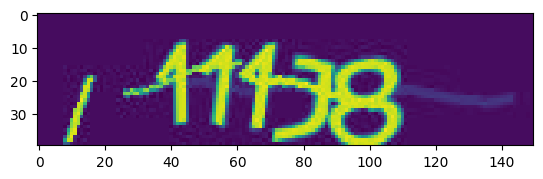

In [373]:
# We are using grayscale images for this model
pic = os.listdir(data_dir)[0]
img = cv2.imread(os.path.join("./sample", pic), cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [374]:
img

array([[5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       ...,
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5],
       [5, 5, 5, ..., 5, 5, 5]], dtype=uint8)

# Data Preprocessing

## 1. Normalizing Images
Data preprocessing involves normalizing the images to ensure that each pixel value is scaled to a range between 0 and 1. This helps in improving the convergence of the neural network during training.

## 2. Encoding Target Labels
The target labels, which are the characters in the CAPTCHAs, are encoded using one-hot encoding. This converts each label into a binary vector where the index corresponding to the label is set to 1 and all other indices are set to 0. This encoding is necessary for training the neural network to recognize the characters in the CAPTCHAs.

In [375]:
pic_target = pic.split(".")[0] 

# To create the output vector for the image we will use one hot encoding
# output is a no.of charactors in the captcha x no. of possible charactors = 5 x 36
# the corresponding charactor will have 1 in the output vector

def encode(text):
    encoded = np.zeros((5, n_char))
    for i, ch in enumerate(text):
        encoded[i, character.index(ch)] = 1
    return encoded

encode(pic_target)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [376]:
# To decode the output vector we will use the following function
def decode(encoded):
    decoded = ""
    for i in range(encoded.shape[0]):
        decoded += character[np.argmax(encoded[i])]
    return decoded
   
decode(encode(pic_target))

'111J8'

## 3. Preprocessing Images
To preprocess the images, the following steps are performed:
- Read the image using OpenCV and convert it to grayscale.
- Normalize the image.
- Reshape the image to the required dimensions.




In [377]:
#preprocesss images
def preprocess():
  X = np.zeros(X_shape)
  y = np.zeros(y_shape)

  for i, pic in enumerate(os.listdir(data_dir)):
    img = cv2.imread(os.path.join("./sample", pic), cv2.IMREAD_GRAYSCALE)
    pic_target = pic.split(".")[0]  # removes the .png extension
    
    # ensuring the length of the captcha is 5
    if len(pic_target) < 6:
      img = img / 255.0
      img = np.reshape(img, img_shape) 

      target = encode(pic_target)
      X[i] = img 
      y[:,i] = target

  return X,y

In [378]:
# X, y = preprocess()

In [379]:
# # Save X and y to an HDF5 file
# import h5py

# with h5py.File('data.h5', 'w') as hf:
#     hf.create_dataset('X', data=X)
#     hf.create_dataset('y', data=y)

## 4. Save and Load Data
The preprocessed data can be saved to and loaded from an HDF5 file for future use.



In [380]:
import h5py

# Load X and y from the HDF5 file
with h5py.File('data.h5', 'r') as hf:
    X = np.array(hf['X'])
    y = np.array(hf['y'])

In [381]:
y.shape

(5, 20000, 62)

## 5. Train-Test Split
Since it's harder to use `train_test_split` with `y`, the split is done manually. The last 100 samples are selected for testing, and the rest are used for training.



In [382]:
# As it is harder to use train_test_split with y, we do it manually
# we select last 100 samples for the testing
X_train, y_train = X[:19900], y[:, :19900]
X_test, y_test = X[19900:], y[:, 19900:]

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (19900, 40, 150, 1)
X_test shape: (100, 40, 150, 1)
y_train shape: (5, 19900, 62)
y_test shape: (5, 100, 62)


## Model Implementation
### To build the model, we can use the Sequential function in keras.models. As the output is a complex tensor, we use the functional API in keras.


In [383]:
# layer for inputs
img_inputs = keras.Input(shape=img_shape)
img_inputs.shape

(None, 40, 150, 1)

In [384]:
# for convolution layers,
# -> Start with initial filter size 16 to learn the basic features. Then increase the filters
# -> window size is 3x3
# -> paddin='same' to obtain the original size of the image as the output
# -> add ReLu activation for non-linearity
conv1 = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation='relu')(img_inputs)
conv1.shape

(None, 40, 150, 16)

In [385]:
# For maxpooling layers,
# -> pool size is 2x2
# -> add a padding 
mp1 = keras.layers.MaxPool2D(pool_size=(2, 2), padding="same")(conv1)
mp1.shape

(None, 20, 75, 16)

In [386]:
# Add one more Covolution layer for extra feature detection with filter size 32
conv2 = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu')(mp1)
conv2.shape

(None, 20, 75, 32)

In [387]:
# Add one more max pool layer for dimension reduction
mp2 = keras.layers.MaxPool2D(pool_size=(2, 2), padding="same")(conv2)
mp2.shape

(None, 10, 38, 32)

In [388]:
# Add one more Covolution layer for extra feature detection with filter size 32
conv3 = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu')(mp2)
conv3.shape

(None, 10, 38, 32)

In [389]:
# Add batch normalization to normalize the output of the previous layer
bn = keras.layers.BatchNormalization()(conv3)
bn.shape

(None, 10, 38, 32)

In [390]:
# Add one more max pool layer for dimension reduction
mp3 = keras.layers.MaxPool2D(pool_size=(2, 2), padding="same")(bn)
mp3.shape

(None, 5, 19, 32)

In [391]:
# Use a Flattern layer to get ready for the output
flattern = keras.layers.Flatten()(mp3)
flattern.shape

(None, 3040)

In [392]:
# as the output layer, we should have separate layers for each of the 5 charactors
# each layer is a result of
# -> Dense layer with 64 neurons
# -> 0.5 Dropout layer to avoid overfitting
# -> Dense layer with n_char neurons for the output
outputs = []
for i in range(5):
    dense = keras.layers.Dense(120, activation="relu")(flattern)
    dropout = keras.layers.Dropout(0.5)(dense)
    output = keras.layers.Dense(n_char, activation="softmax")(dropout)
    outputs.append(output)

In [393]:
# Define the model
model = keras.Model(inputs=img_inputs, outputs=outputs, name="captcha_model")

In [394]:
model.summary()

Model: "captcha_model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 40, 150,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 40, 150,   │        160 │ input_layer_8[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_24    │ (None, 20, 75,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 20, 75,    │      4,640 │ max_pooling2d_24… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_25    │ (None, 10, 38,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 10, 38,    │      9,248 │ max_pooling2d_25… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 10, 38,    │        128 │ conv2d_26[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_26    │ (None, 5, 19, 32) │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 3040)      │          0 │ max_pooling2d_26… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 120)       │    364,920 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 120)       │    364,920 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 120)       │    364,920 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 120)       │    364,920 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 120)       │    364,920 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_40          │ (None, 120)       │          0 │ dense_80[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 120)       │          0 │ dense_82[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 120)       │          0 │ dense_84[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 120)       │          0 │ dense_86[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 120)       │          0 │ dense_88[0][0]  

 Total params: 1,876,286 (7.16 MB)

 Trainable params: 1,876,222 (7.16 MB)

 Non-trainable params: 64 (256.00 B)

In [395]:
# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [396]:
# Fit the model
# plot = model.fit(X_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]], epochs=100, batch_size=100)

In [397]:
# # To save the history of the training
# import matplotlib.pyplot as plt
# import pickle
# with open('training_history.pkl', 'wb') as f:
#     pickle.dump(plot.history, f)

In [398]:
import pickle
import matplotlib.pyplot as plt

# Load the training history from the file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

In [399]:
# # Save the model
# model.save('./model.h5')

In [400]:
from tensorflow.keras.models import load_model

model = load_model('./model.h5')

## Model Evaluation and Discussion
Fit the model to the training data and evaluate its performance on the test data. The evaluation includes plotting loss and accuracy for each character.



In [401]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model('./model.h5')

# Recompile the model with appropriate loss functions and metrics
model.compile(
    optimizer='adam',
    loss=['categorical_crossentropy'] * 5,  # Loss function for each output
    metrics=['accuracy'] * 5               # Metrics for each output
)

# Assuming X_test and y_test are already loaded and have the correct shape
# Example shapes
# X_test = np.load('X_test.npy')  # Example: (num_samples, 50, 200, 1)
# y_test = [np.load('y_test_0.npy'), np.load('y_test_1.npy'), np.load('y_test_2.npy'), np.load('y_test_3.npy'), np.load('y_test_4.npy')]

# Check the shapes of the test data
print(f'X_test shape: {X_test.shape}')
for i in range(5):
    print(f'y_test[{i}] shape: {y_test[i].shape}')

# Evaluate the model
losses_and_accuracies = model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])
print(f'Test Loss: {losses_and_accuracies[0]}')
for i in range(5):
    print(f'Test Accuracy for character {i + 1}: {losses_and_accuracies[i + 1] * 100:.2f}%')


X_test shape: (100, 40, 150, 1)
y_test[0] shape: (100, 62)
y_test[1] shape: (100, 62)
y_test[2] shape: (100, 62)
y_test[3] shape: (100, 62)
y_test[4] shape: (100, 62)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - dense_1_accuracy: 0.7705 - dense_3_accuracy: 0.1362 - dense_5_accuracy: 0.3032 - dense_7_accuracy: 0.3518 - dense_9_accuracy: 0.3768 - loss: 20.7168 
Test Loss: 20.739458084106445
Test Accuracy for character 1: 77.00%
Test Accuracy for character 2: 14.00%
Test Accuracy for character 3: 31.00%
Test Accuracy for character 4: 39.00%
Test Accuracy for character 5: 39.00%


In [402]:
# model.evaluate(X_test, [y_test[0], y_test[1], y_test[2], y_test[3], y_test[4]])

In [403]:
import os

file_path = 'training_history.pkl'

# Check file size
file_size = os.path.getsize(file_path)
print(f"File size: {file_size} bytes")

# If the file is not empty, try to read the content
if file_size > 0:
    with open(file_path, 'rb') as f:
        data = f.read()
        print(f"File content (first 10 bytes): {data[:100]}")
else:
    print("File is empty.")


File size: 10137 bytes
File content (first 10 bytes): b"\x80\x04\x95\x8e'\x00\x00\x00\x00\x00\x00}\x94(\x8c\x04loss\x94]\x94(G@3-\xae \x00\x00\x00G@1\x9f\x9b\x00\x00\x00\x00G@.\xf2\x92\x80\x00\x00\x00G@+\x0b(\x80\x00\x00\x00G@'\xcc\xa7\x00\x00\x00\x00G@%F\xdd\x80\x00\x00\x00G@#-`\x00\x00\x00\x00G@!pj\x80\x00\x00\x00G@\x1f\xfb"


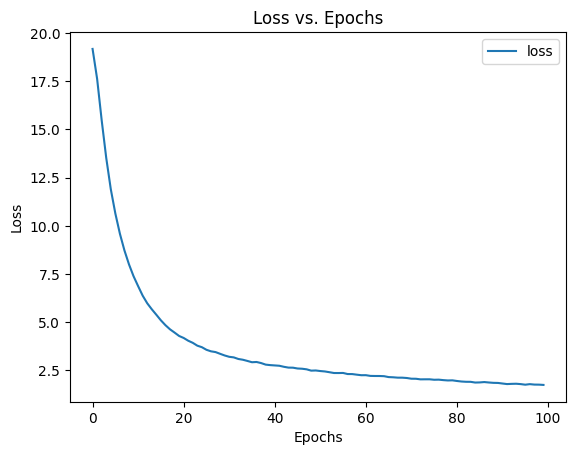

In [404]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Plot the loss vs. epochs
for label in ["loss"]:
    plt.plot(history[label], label=label)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs. Epochs")
plt.show()



dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_9_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'dense_9_accuracy'])


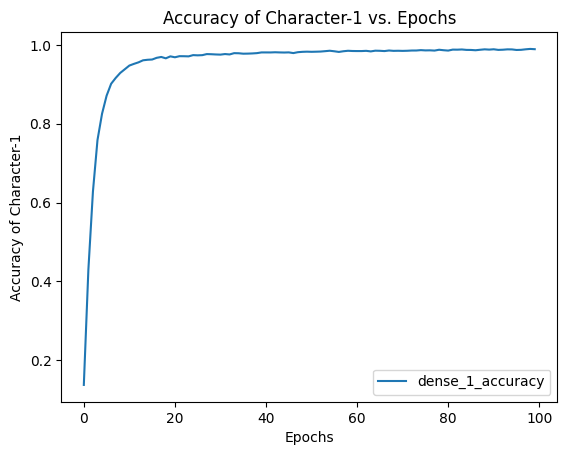

In [405]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Verify the content of the history
print(history.keys())  # Check available keys, e.g., ['loss', 'accuracy', 'val_loss', 'val_accuracy']

# Plot the accuracy of character-1 vs epochs
for label in ["dense_1_accuracy"]:  # Use the correct key here
    plt.plot(history[label], label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Character-1")
plt.title("Accuracy of Character-1 vs. Epochs")
plt.show()


dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_9_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'dense_9_accuracy'])


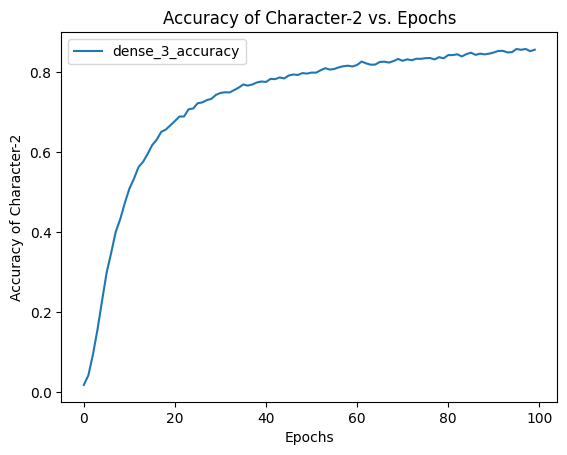

In [406]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Verify the content of the history
print(history.keys())  # Check available keys, e.g., ['loss', 'accuracy', 'val_loss', 'val_accuracy']



# Plot the accuracy of character-2 vs epochs
for label in ["dense_3_accuracy"]:  # Use the correct key here
    plt.plot(history[label], label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Character-2")
plt.title("Accuracy of Character-2 vs. Epochs")
plt.show()


dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_9_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'dense_9_accuracy'])


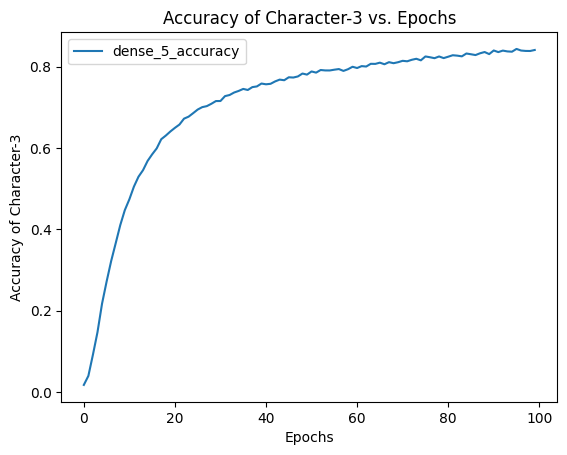

In [407]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Verify the content of the history
print(history.keys())  # Check available keys, e.g., ['loss', 'accuracy', 'val_loss', 'val_accuracy']

# Plot the accuracy of character-3 vs epochs
for label in ["dense_5_accuracy"]:  # Use the correct key here
    plt.plot(history[label], label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Character-3")
plt.title("Accuracy of Character-3 vs. Epochs")
plt.show()


dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_9_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'dense_9_accuracy'])


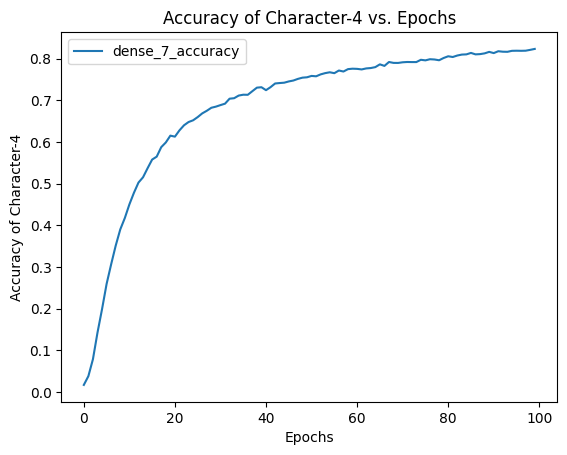

In [408]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Verify the content of the history
print(history.keys())  # Check available keys, e.g., ['loss', 'accuracy', 'val_loss', 'val_accuracy']

# Plot the accuracy of character-4 vs epochs
for label in ["dense_7_accuracy"]:  # Use the correct key here
    plt.plot(history[label], label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Character-4")
plt.title("Accuracy of Character-4 vs. Epochs")
plt.show()


dict_keys(['loss', 'dense_1_loss', 'dense_3_loss', 'dense_5_loss', 'dense_7_loss', 'dense_9_loss', 'dense_1_accuracy', 'dense_3_accuracy', 'dense_5_accuracy', 'dense_7_accuracy', 'dense_9_accuracy'])


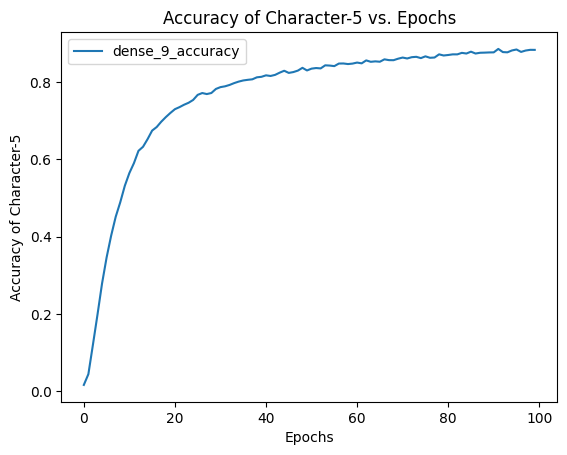

In [409]:
import pickle
import matplotlib.pyplot as plt

# Load the history pickle file
with open('training_history.pkl', 'rb') as f:
    history = pickle.load(f)

# Verify the content of the history
print(history.keys())  # Check available keys, e.g., ['loss', 'accuracy', 'val_loss', 'val_accuracy']

# Plot the accuracy of character-5 vs epochs
for label in ["dense_9_accuracy"]:  # Use the correct key here
    plt.plot(history[label], label=label)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy of Character-5")
plt.title("Accuracy of Character-5 vs. Epochs")
plt.show()


In [410]:
# to predict single image
def predict_single(img):
    img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (width, height))
    img = img / 255.0
    img = np.reshape(img, img_shape)
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    captcha = ""
    for i in range(5):
        captcha += character[np.argmax(pred[i])]
    return captcha

In [411]:
def show_image_with_prediction(image_path):
    image = cv2.imread(image_path)
    predicted = predict_single(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots()
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f"Prediction: {predicted}", fontsize=16)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


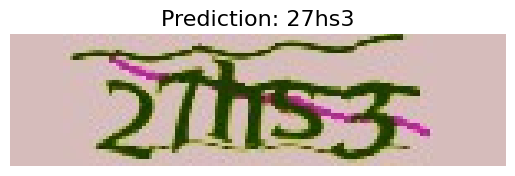

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


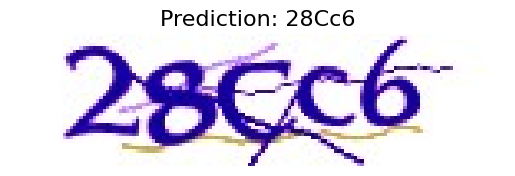

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


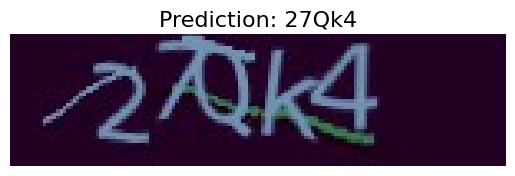

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


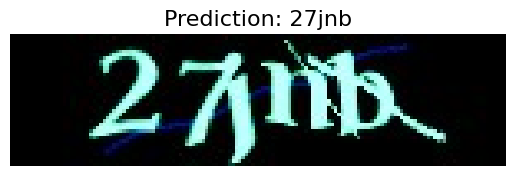

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


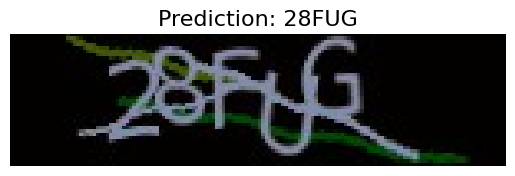

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


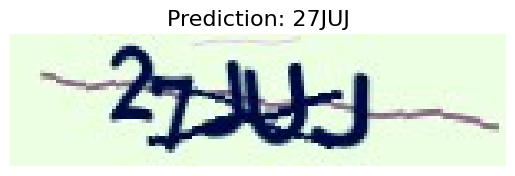

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


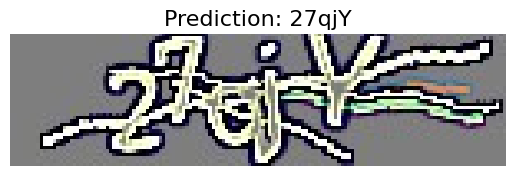

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


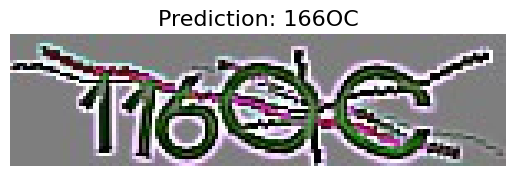

In [412]:
# List of image file paths
image_paths = [
    "./test/27hs3.jpg",
    "./test/28Cc6.jpg",
    "./test/27Qk4.jpg",
    "./test/27jnb.jpg",
    "./test/28FUG.jpg",
    "./test/27JUJ.jpg",
    "./test/27qjY.jpg",
    "./test/116OC.jpg"
]

# Display each image with prediction
for image_path in image_paths:
    show_image_with_prediction(image_path)


## Conclusion
This study demonstrates the effectiveness of using a straightforward CNN architecture with a relatively small storage requirement to recognize CAPTCHA characters. The model achieves high accuracy in identifying each character of the CAPTCHA, making it a viable solution for automated CAPTCHA recognition.
